In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import time
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [2]:
varBasuras=['B11','B13','B14','B21','B23','B24','B46','B48',
            'B51','B52','B53','B54','B61','B62','B63','B64',
            'B65','B66','B67','B611','B85']

In [37]:
train=pd.read_csv('TrainCsv.csv')
test=pd.read_csv('TestCsv.csv')
print(train.shape,test.shape)

(1798, 42) (545, 41)


In [5]:
print(test.columns)

Index(['CODIGO_EMPRESA', 'B11', 'B12', 'B13', 'B14', 'B21', 'B22', 'B23',
       'B24', 'B31', 'B32', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47',
       'B48', 'B51', 'B52', 'B53', 'B54', 'B61', 'B62', 'B63', 'B64', 'B65',
       'B66', 'B67', 'B68', 'B69', 'B610', 'B611', 'B612', 'B613', 'B81',
       'B82', 'B83', 'B84', 'B85'],
      dtype='object')


In [13]:
print(train.columns)

Index(['FRACASO', 'B11', 'B12', 'B13', 'B14', 'B21', 'B22', 'B23', 'B24',
       'B31', 'B32', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48',
       'B51', 'B52', 'B53', 'B54', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66',
       'B67', 'B68', 'B69', 'B610', 'B611', 'B612', 'B613', 'B81', 'B82',
       'B83', 'B84', 'B85'],
      dtype='object')


In [50]:

y=train['FRACASO']
X=train.iloc[:,3:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X.head()

,B22,B31,B32,B41,B42,B43,B44,B45,B47,B68,B69,B610,B612,B613,B81,B82,B83,B84
0,0.054788,0.097446,0.187087,0.121726,0.379078,0.611137,0.513691,0.715467,0.284533,1.066784,0.297489,1.493572,0.399751,0.016188,0.060745,0.177370,0.017284,0.016202
1,0.036778,0.554977,0.000000,0.064919,0.304219,0.854557,0.299580,0.445023,0.554977,2.474149,0.130267,1.714751,0.102969,-0.098457,0.000052,0.000052,0.000029,0.000012
2,0.035834,0.589369,0.000000,0.036412,0.423890,0.965261,0.375892,0.410631,0.589369,1.034150,0.071542,1.896541,0.374806,-0.117346,0.025741,0.025741,0.015171,0.014670
3,0.032684,0.500754,0.083530,0.312465,0.797656,0.830520,0.329766,0.415716,0.584284,2.835855,0.440071,1.169690,0.275579,0.025202,0.006529,0.007618,0.003815,0.001345
4,-0.879894,0.661144,0.000000,0.006681,0.892480,0.892480,0.231336,0.338856,0.661144,1.866452,0.015802,2.110823,0.025350,-0.201182,0.146241,0.146241,0.096686,0.051802


In [51]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)


LinearDiscriminantAnalysis()

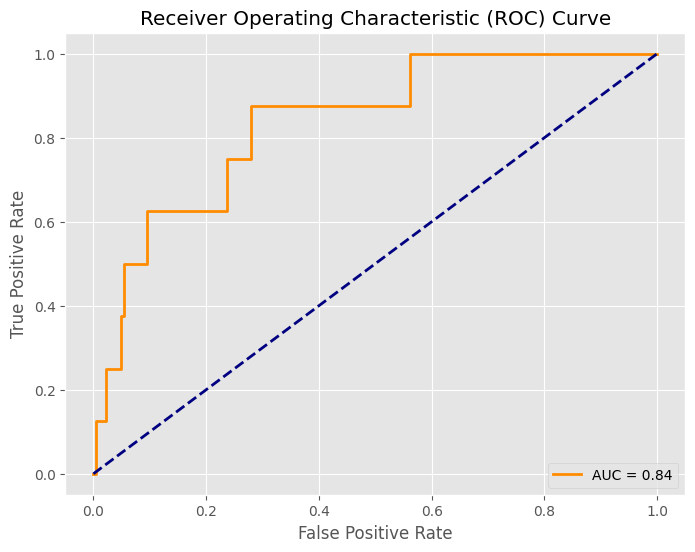

In [52]:
# Transform the training data
X_train_lda = lda.transform(X_train)

# Transform the test data
X_test_lda = lda.transform(X_test)

# Predict on the test set
y_scores = lda.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


13

In [42]:
y_scores

array([ -6.51942754,  -9.43698849,  -9.2264197 ,  -5.36667236,
        -6.78336117,  -0.58294021,  -7.2742754 ,  -6.88324326,
        -8.4393011 ,  -7.52476552, -12.55558018,  -8.26097853,
        -4.42730307,  -7.76939875,  46.58489754,  -7.20315039,
        -5.05076907,  -8.65798155,  -3.05563392,  -8.14966603,
        -6.60292455,  -4.38954168,  -8.14871603,  -6.8616899 ,
        -6.03421678,  -3.59838723,  -7.74441406,  -7.23806155,
        -9.44703747,  -7.06010116,  -6.62374134,  -7.52686044,
        -7.21141969,  -6.63230973,  -9.36165297,  -7.36725792,
        -5.92960986,  -6.49655146,  -2.85252542,  -7.08836531,
        -7.22084948,  -5.73647923,  -8.54754219,  -5.16944723,
        -6.46934127,  -7.94553256,  -8.87212699,  -6.90009472,
         4.6027549 ,  -8.57249287,  -8.08570217,  -5.26955474,
        -8.09068723,  -6.74776878, -12.01532056,  -8.73062539,
        -6.44090113,  -6.16841679,  14.23274445,  -7.36943215,
        -6.88366678,  -7.90762992,  -7.78731111,  -7.64